# <center><h2><b>Difuzní olejová vývěva</b></h2></center>


[**Návod**](https://richardsvejkar.cz/assets/02dov.pdf)


In [2]:
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
import pandas as pd
from inspect import signature
import sys
sys.path.append('C:/Users/aleks/Projects/arameic-mishmash')  
import my_module as mm
import scipy.constants as c
#!!! change it each time
path='C:/Users/aleks/Projects/arameic-mishmash/VKT/DOV/Data/'


 **Čerpání uzavřeného objemu**
 --
Čerpání začalo rotačka z atmosférického tlaku, po dosažení tlaku 10 Pa se otevřel ventil na difuzku, kvůli tomu se tlak trochu zvyšil (v samotné difuzce byla atmosféra). Následně už čerpala i difuzka.  
 **POZOR** Tlak se měřil postupně třemi různými měrkami, druhá je v Torrech  
 * Graf p(t)  
 * Vysvetlit jednotlivé změny 

In [3]:
tlak=pd.read_csv(f'{path}uloha1.csv', header=0, delimiter=';', decimal=',')
tlak.head()

,t,p
0,0,97200.0
1,10,12400.0
2,20,1100.0
3,30,150.0
4,40,46.0


C:\Users/aleks/Projects/arameic-mishmash\my_module.py:98: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
C:\Users\aleks\anaconda3\lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: AutoMinorLocator does not work with logarithmic scale
  self.figure.savefig(buf, format='png', dpi='figure')


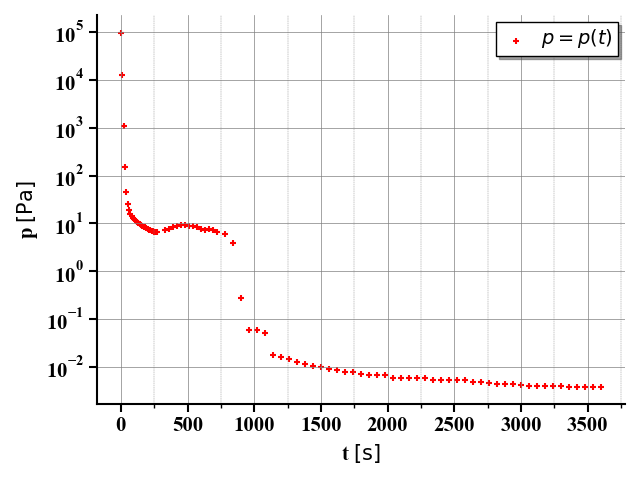

In [4]:
fig, ax1 = plt.subplots()
ax1.scatter(tlak['t'],tlak['p'], c='r', marker='+', s=15, label=r'$p=p(t)$')
ax1.set_yscale('log')
mm.plot_param(ax1, xlabel=r't $\mathrm{[s]}$', ylabel=r'p $\mathrm{[Pa]}$', grid = True, ticks=True)


 **Cejchování Penningova manometru**
 --
Vem si data peninga, data ionizacni vakuovky, udělej kalibracni krivku, jdi se projit

In [5]:
kalib=pd.read_csv(f'{path}kalib.csv', header=0, delimiter=';', decimal=',')
kalib.head()

,dilkyPi,pi,ppen
0,9.0,0.012000,0.02
1,2.5,0.033333,0.05
2,4.2,0.056000,0.10
3,6.5,0.086667,0.20


1. parameter = 3.99e-01 ± 5.02e-02
2. parameter = 1.01e-02 ± 5.78e-03
%%%%%%


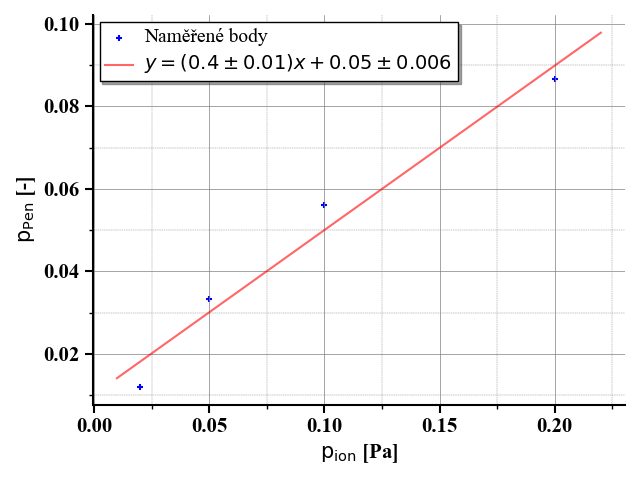

In [6]:
fig, ax2 = plt.subplots()
ax2.scatter(kalib['ppen'],kalib['pi'], c='b', marker='+', s=15, label='Naměřené body')

#fit
def krivka(x,a,b):
    y=a*x+b
    return y
fit, params=mm.split_fit(kalib[['ppen','pi']], krivka, extraplus=0.02, extraminus=1e-2)
label=fr'$y=({params[0][0]:.1}\pm{params[0][1]:.1})x+{params[1][0]:.1}\pm{params[1][1]:.1}$'
ax2.plot(fit['ppen'],fit['pi'], color='r', alpha=0.6, label=label)
mm.plot_param(ax2, xlabel=r'$\mathrm{p_{ion}}$ [Pa]', ylabel=r'$\mathrm{p_{Pen}}$ [-]', grid = True, ticks=True)
plt.show()


**Vliv výstupního tlaku na funkci DOV**
---
Záměrně jsme sabotovali ionizacni měrku zvyšením tlaku před DOV - chvíle kdy k tomu došlo je cvhíle kde DOV už nemohla čerpat s takovým tlakem

In [7]:
pir=pd.read_csv(f'{path}uloha3.csv', header=0, delimiter=';', decimal=',')
pir.head()


,p_i [Pa],p_pir[mbar],p_pir[Pa]
0,NaN,0.35,35.0
1,NaN,0.30,30.0
2,NaN,0.29,29.0
3,na nicc,0.23,23.0
4,na nicc,0.14,14.0


**Full data info:**

In [8]:
pir[['p_pir[Pa]', 'p_pir[mbar]']].describe()

,p_pir[Pa],p_pir[mbar]
count,5.000000,5.000000
mean,26.200000,0.262000
std,8.043631,0.080436
min,14.000000,0.140000
25%,23.000000,0.230000
50%,29.000000,0.290000
75%,30.000000,0.300000
max,35.000000,0.350000


**Info without two last shitty samples:**

In [9]:
pir[['p_pir[Pa]', 'p_pir[mbar]']][:3].describe()

,p_pir[Pa],p_pir[mbar]
count,3.000000,3.000000
mean,31.333333,0.313333
std,3.214550,0.032146
min,29.000000,0.290000
25%,29.500000,0.295000
50%,30.000000,0.300000
75%,32.500000,0.325000
max,35.000000,0.350000


Efektivní čerpací rychlos nad V2
---
Mezi baňkou a DOV je teď clona. Pootevřením JV2 začneme měnit tlak v báňce, tlak u DOV se bude měnit pomaleji.  
Z rozdílu tlaků máme napočítat čerpací rychlost. 
* * *
<div>
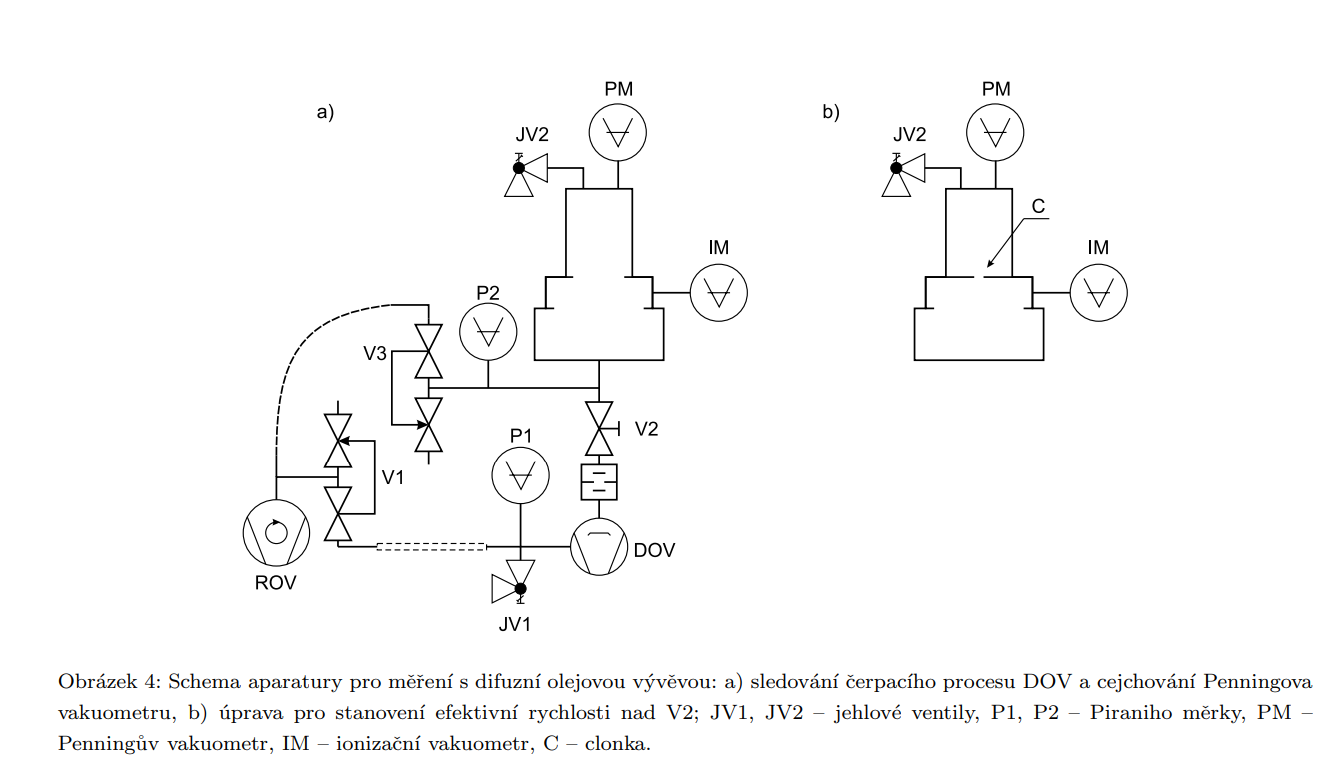
</div>

### Potřebné vzorce:
$\Delta p = p_\mathrm{P}-p_\mathrm{I}$  
* * *
**Efektivní čerpací rychlost:**

\begin{equation}
        S_{\mathrm{ef}}=\frac{q}{p}=\frac{p_{\mathrm{A}}}{q}\frac{dV}{dt}
        \label{sefikt}
    \end{equation}  
    
    
\begin{equation}
        \frac{dp}{dt}=\frac{q}{V} \;\;\; \mathrm{nebo} \;\;\; \frac{\ln p}{dt}=\frac{q}{pV}
\end{equation}
* * *
**Střední rychlost molekul vzduchu, kde M=28,96 g/mol**
    \begin{equation}
           \bar v=\sqrt{\frac{8}{\pi}\frac{RT}{M}}
        \label{strrych}
    \end{equation}
***

 **Střední volná dráha $l_s$**
    \begin{equation}
        l_s\approx \frac{7}{p_s \cdot 10^3}
    \label{strvln}
    \end{equation}.
    
 
***


In [41]:
tlaky=pd.read_csv(f'{path}uloha4.csv', header=0, delimiter=';', decimal=',')

tlaky['p_pen']=kalib['pi'] #using calibration I changed unitless p_pen to calibrated value
tlaky.head() 

,p_ion,p_pen
0,0.007066,0.012000
1,0.009466,0.033333
2,0.012399,0.056000
3,0.019998,0.086667


In [42]:
rych['lstr']=7/(rych['p_ion']*1e3)

In [43]:
rych.head()

,p_ion,p_pen,lstr
0,0.007066,0.012000,0.990647
1,0.009466,0.033333,0.739497
2,0.012399,0.056000,0.564563
3,0.019998,0.086667,0.350029


**If    $\; \; \; p\cdot\lambda<0.02\; \; \; $    then the molecular flux is intented**

In [39]:
#Podminka molekularity
rych['lstr']*rych['p_pen']

0    0.011888
1    0.024650
2    0.031616
3    0.030336
dtype: float64

**Stredni rychlost**   $\;\;v_{str}=\sqrt{\frac{8}{\pi}\frac{RT}{M}}$

In [40]:

v_str=np.sqrt(8/np.pi*c.R*300/29.96e-3)
v_str

460.4440577054198

**Obsah otvoru** $\;\; A=\pi R^2$

In [29]:
A=np.pi*(2.5e-3**2)
A

1.9634954084936207e-05

**Vodivost tenkeko otvoru mol proudeni** $C_{m0}=\frac{1}{4}A v_{str}$

In [30]:
Cmo=1/4*(A)*v_str
Cmo

0.002260199482931909

In [31]:
#pomer otvoru l/r
lr=1/2.5
lr

0.4

**Clausinguv koeficient**
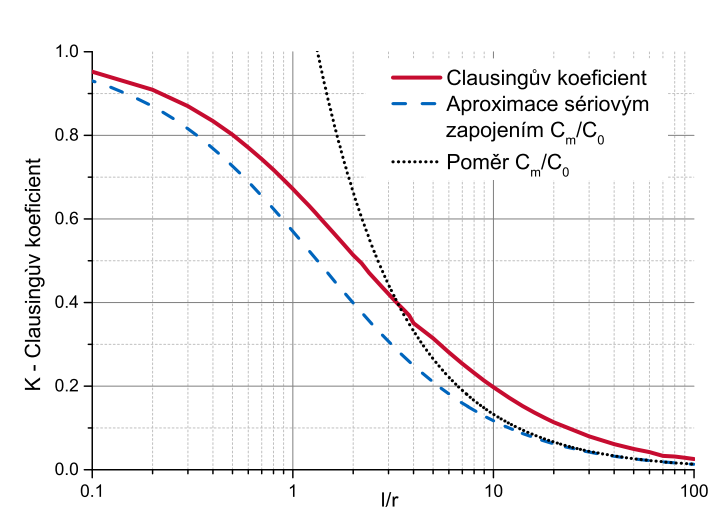

In [32]:
K=0.8

**Vodivost otvoru** $C=C_{m0}\cdot K$

In [33]:
C=Cmo*K
C

0.0018081595863455272

**Proud plynu** $q=C\Delta p=C(p_\mathrm{P}-p_\mathrm{I})$

In [47]:
q=C*(tlaky['p_pen']-tlaky['p_ion'])
q

0    0.000009
1    0.000043
2    0.000079
3    0.000121
dtype: float64

**Efektivni cerp rychlost** $S_{ef}=\frac{q}{p_{pen}}$

In [58]:
Sef1=q/tlaky['p_pen']
Sef1.describe()

count    4.000000
mean     0.001209
std      0.000314
min      0.000743
25%      0.001157
50%      0.001343
75%      0.001395
max      0.001408
dtype: float64